In [1]:
import mnist_reader
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

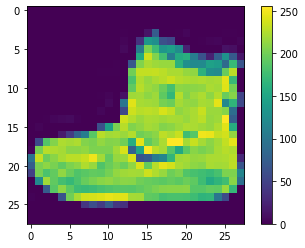

In [4]:
X_train = (X_train.reshape(-1,28,28))
X_test = (X_test.reshape(-1,28,28))
plt.imshow(X_train[0])
plt.colorbar()

In [5]:
def get_model(x):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(x, activation='relu'),
        keras.layers.Dense(10)
    ])
    return model

In [6]:
models = []
models_trained = []
sizes = [10,20,50,100,128,256,512,784]
for i in sizes:
    models.append(get_model(i))

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt =tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999)

for i in range(len(models)):
    models[i].compile(opt, loss,validation_split=0.2, metrics=['accuracy'])
    models_trained.append(models[i].fit(X_train, y_train,validation_split=0.2, epochs=5))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 56us/sample - loss: 2.1318 - accuracy: 0.2050 - val_loss: 2.0131 - val_accuracy: 0.2062
Epoch 2/5
48000/48000 [==============================] - 2s 41us/sample - loss: 1.9244 - accuracy: 0.2488 - val_loss: 1.8456 - val_accuracy: 0.2763
Epoch 3/5
48000/48000 [==============================] - 2s 43us/sample - loss: 1.8237 - accuracy: 0.2852 - val_loss: 1.7897 - val_accuracy: 0.3097
Epoch 4/5
48000/48000 [==============================] - 2s 42us/sample - loss: 1.6224 - accuracy: 0.3459 - val_loss: 1.4862 - val_accuracy: 0.3913
Epoch 5/5
48000/48000 [==============================] - 2s 42us/sample - loss: 1.3884 - accuracy: 0.3897 - val_loss: 1.3578 - val_accuracy: 0.3939
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 52us/sample - loss: 2.7811 - accuracy: 0.1012 - val_loss: 2.3040 - val_accuracy: 0.0983
Epoch 2/5
48

Text(0.5, 1.0, 'choosing hidden layer size')

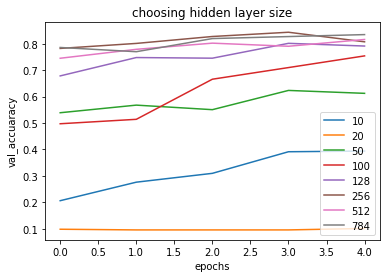

In [7]:
for i in range(len(models)):
    plt.plot(models_trained[i].history['val_accuracy'])
plt.ylabel('val_accuaracy')
plt.xlabel('epochs')
plt.legend(sizes)
plt.title("choosing hidden layer size")

In [8]:
for i in range(len(models)):
    print(i, max(models_trained[i].history['val_accuracy']))

0 0.39391667
1 0.10125
2 0.6231667
3 0.75375
4 0.80125
5 0.84316665
6 0.81583333
7 0.83425


In [9]:
models = []
models_trained = []
rates = [0.0001,0.0002,0.0005, 0.001, 0.002, 0.005]
for i in range(len(rates)):
    models.append(get_model(sizes[5]))
    
for i in range(len(models)):
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    opt =tf.keras.optimizers.Adam(
    learning_rate=rates[i], beta_1=0.9, beta_2=0.999)
    models[i].compile(opt, loss, metrics=['accuracy'])
    models_trained.append(models[i].fit(X_train, y_train, validation_split=0.2, epochs=10))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 67us/sample - loss: 10.4137 - accuracy: 0.7385 - val_loss: 6.1989 - val_accuracy: 0.7828
Epoch 2/10
48000/48000 [==============================] - 3s 57us/sample - loss: 4.8632 - accuracy: 0.8026 - val_loss: 4.3116 - val_accuracy: 0.8014
Epoch 3/10
48000/48000 [==============================] - 3s 57us/sample - loss: 3.2997 - accuracy: 0.8196 - val_loss: 3.6168 - val_accuracy: 0.8050
Epoch 4/10
48000/48000 [==============================] - 3s 60us/sample - loss: 2.5329 - accuracy: 0.8311 - val_loss: 2.8269 - val_accuracy: 0.8249
Epoch 5/10
48000/48000 [==============================] - 3s 60us/sample - loss: 2.0668 - accuracy: 0.8377 - val_loss: 2.4399 - val_accuracy: 0.8267
Epoch 6/10
48000/48000 [==============================] - 3s 57us/sample - loss: 1.7248 - accuracy: 0.8477 - val_loss: 2.1190 - val_accuracy: 0.8278
Epoch 7/10
48000/48000 [==============================]

Text(0.5, 1.0, 'choosing learning rate')

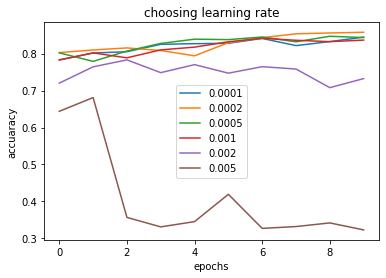

In [10]:
for i in range(len(models)):
    plt.plot(models_trained[i].history['val_accuracy'])
plt.ylabel('accuaracy')
plt.xlabel('epochs')
plt.legend(rates)
plt.title("choosing learning rate")

In [11]:
for i in range(len(models)):
    print(i, max(models_trained[i].history['val_accuracy']))

0 0.84433335
1 0.85758334
2 0.8466667
3 0.8411667
4 0.78283334
5 0.68091667


In [17]:
model = get_model(sizes[5])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt =tf.keras.optimizers.Adam(
learning_rate=rates[1], beta_1=0.9, beta_2=0.999)
model.compile(opt, loss, metrics=['accuracy'])
models_trained.append(model.fit(X_train, y_train, epochs=20))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/sample - loss: 8.9729 - accuracy: 0.7649
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 3.0340 - accuracy: 0.8084
Epoch 3/20
60000/60000 [==============================] - 3s 57us/sample - loss: 1.3396 - accuracy: 0.8041
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5972 - accuracy: 0.8207
Epoch 5/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4718 - accuracy: 0.8411
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4197 - accuracy: 0.8510
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3827 - accuracy: 0.8620
Epoch 8/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3668 - accuracy: 0.8674
Epoch 9/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3450 - accuracy: 0.8756
Epoch 10/20
60

In [18]:
predictions = model.predict(X_test)
acc = 0
for i in range(len(y_test)):
    if np.argmax(predictions[i]) == y_test[i]:
        acc += 1
print("accuracy on test data:",acc/len(y_test))

accuracy on test data: 0.8612


In [19]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.save('my_model') 

INFO:tensorflow:Assets written to: my_model\assets
